<a href="https://colab.research.google.com/github/renezanelli/data_science/blob/master/Project_Airbnb_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis - Rio de Janeiro

Founded in 2008 with some students offering an air matress, bed and breakfast in their apartment, [Airbnb](https://www.airbnb.com/) is now one of the world's largest marketplace for places to stay, offering over 7 million acomodations in more than 200 countries and regions.

Connecting people who want to discover new places and experiences with local hosts, Airbnb offers a practical and affordable solution, with financial leverage for both parties and, most importantly, promoting people-to-people community and trust around the world. 

One of the most famous tourist destinations in Brazil is the city of Rio de Janeiro and, with the expensive prices offered by the hotels, Airbnb properties have become the most popular accomodations. Therefore, in this project we analyse the [dataset](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv) provided by [Inside the Airbnb](http://insideairbnb.com/get-the-data.html) regarding the Airbnb accomodations in the city of Rio de Janeiro, and try to transform the raw data into usefull information and insights.



<center><img alt="Analisando Airbnb" width="80%" src="https://img.ibxk.com.br/2017/06/12/12190700114500.jpg?w=1120&h=420&mode=crop&scale=both"></center>

# Data Aquisition

Airbnb has the policy of providing a huge amount of data of the most visited cities in the world. The dataset used in this project is the Rio de Janeiro's `listings.csv`, updated in 20 April 2020.

The raw data can be accessed by clicking [here](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv). 

In [2]:
# import of usefull Python modules
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# read the csv file
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv')

# Data Analysis

Once the dataset is already loaded, getting to know the size of the data frame, the types of data and how they are disposed are the first steps.

In [4]:
# first look at the DataFrame containing the information
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


In [5]:
# checking the size of the DataFrame
print("Rows:\t {}".format(df.shape[0], left_aligned=True))
print("Columns: {}\n".format(df.shape[1], left_aligned=True))

# checking the type of the variables
display(df.dtypes)

Rows:	 35870
Columns: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Checking for *Null* Values in the Data

*Null* values can compromise the analysis, so they must be identified and deleted (or replaced).


In [6]:
(df.isnull().sum().sort_values(ascending=False)/df.shape[0])

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Since the percentage of *null* values in teh columns `neighbourhood_group`, `reviews_per_month` and `last_review` is considerably high (over 40%), those columns shall be deleted.

In [0]:
df.drop(['neighbourhood_group', 'reviews_per_month', 'last_review'], axis=1, inplace=True)

## Data Distribution Analysis

Analysing data distribution, is possible to verify the range of values and check if some of them are outliers. To perform this analysis, histogram plots and statistical information are assessed.

### Histograms

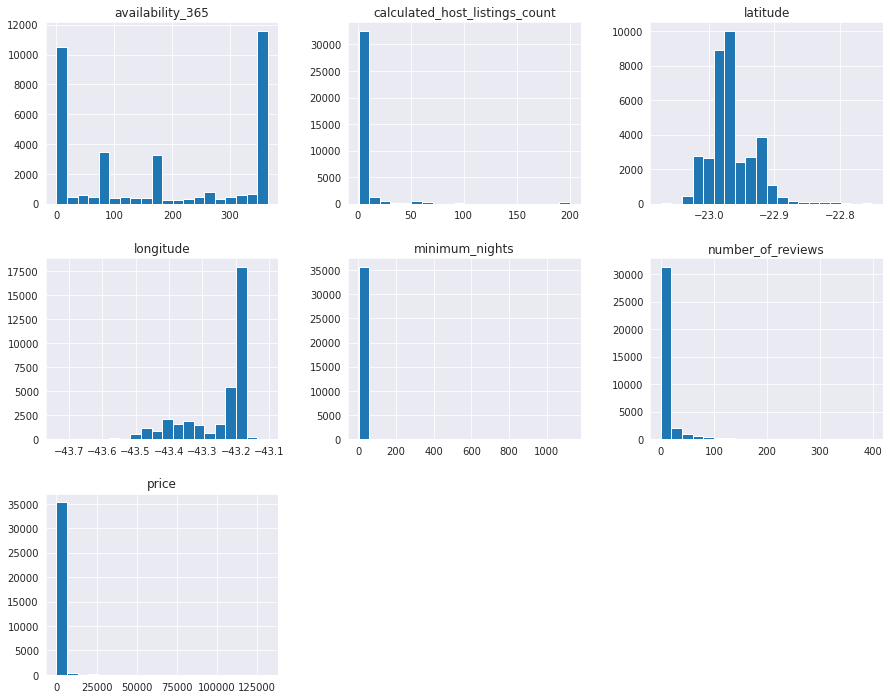

In [8]:
df.drop(['id', 'host_id'], axis=1).hist(figsize=(15, 12), bins=20);

It is possible to verify that there might be some outliers in the columns `calculated_host_listings_count`, `minimum_nights` and `price`. Those values appears to be distorcing the distribution of theese columns. 

To detect the actual outliers there are two simple tools that can be used:
* Statitical resume with method `.describe()`
* Use of `boxplots`


In [9]:
# Some statistical information can be accessed using the built-in function .describe(), although they only represent
# usefull information for quantitative data 
df.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1).describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,6.613995,180.371815
std,2229.366334,22.471085,25.827647,22.769663,152.510778
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,200.000000,365.000000


From the statistical resume it can be assessed that:
* The column `price` presents 75% os its values bellow 632, but its maximum value is over 200 times bigger
* The maximum value in the column `minimum_nights` exceeds the number of days in a year

Those observation also indicates the existence of outliers. Some `boxplots` are used to better ilustrate them.

### Boxplot `minimum_nights`

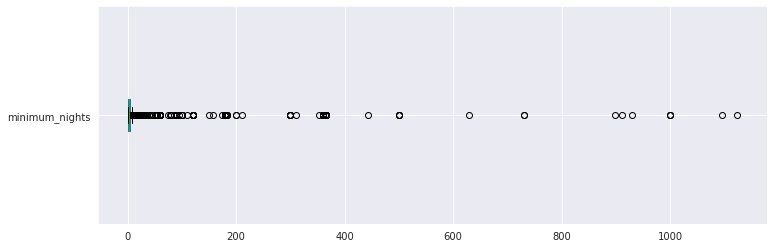

Values above 30 respond to 0.6245%


In [10]:
df['minimum_nights'].plot(kind='box', vert=False, figsize=(12,4));
plt.show()
print('Values above 30 respond to {:.4f}%'.format(((df[df['minimum_nights']>30].shape[0])/df.shape[0])*100))

### Boxplot `price`

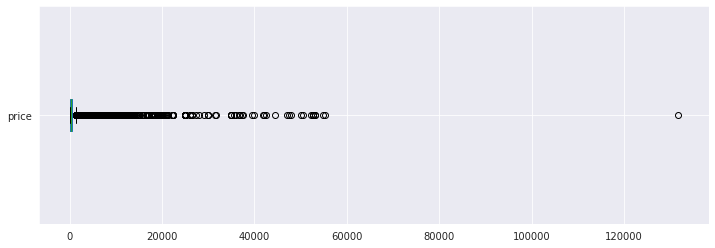

Values above 1500 respond to 9.3672%


In [11]:
df['price'].plot(kind='box', vert=False, figsize=(12,4));
plt.show()
print('Values above 1500 respond to {:.4f}%'.format(((df[df['price']>1500].shape[0])/df.shape[0])*100))

As presented in the `boxplots`, the values of `price` above 1500 and of `minimum_nights` above 30 are a minority that were distorcing the distributionof data. Most of them are probably consequence of some error in data aquisition.

Those values are, therefore, deleted from the dataset and new histograms are presented with better distribution.

### Clean Data

A new Data Frame is generated without the outliers presented above.

In [0]:
df_new = df[(df['price']<=1500) & (df['minimum_nights']<=30)]

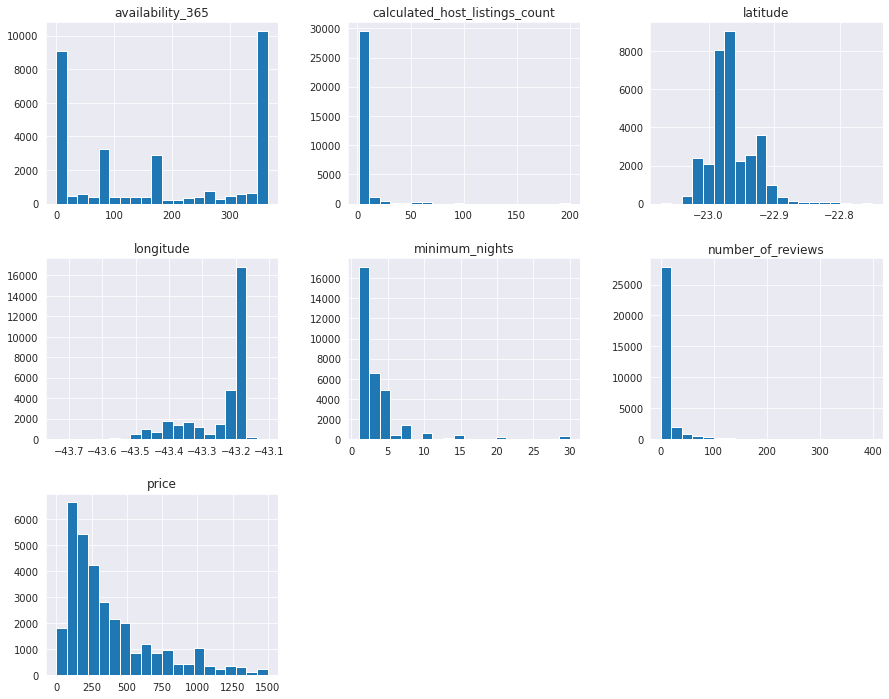

In [13]:
df_new.drop(['id', 'host_id'], axis=1).hist(figsize=(15, 12), bins=20);

### Most Expensive Neighbourhoods 

In [14]:
df_new.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     522.097859
Abolição                  483.666667
Leblon                    479.767359
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Name: price, dtype: float64

For those who are familiar with in the city of Rio de Janeiro or have done some research about [the most expensive neighbourhoods in Rio](https://www.temsustentavel.com.br/rankings-dos-m%C2%B2-mais-caros-rio-de-janeiro-e-sao-paulo/), it can be observed that the higher Airbnb prices don't illustrate properly the reality of prices in the city. A possible reason for this unexpected result might be the ammount of available Airbnb accomodations and the kind of property they are.

Those information are presented bellow, with some statistical information that can help the observation.

In [0]:
nh_price = df_new.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

NH = []
NUM = []
AVG = []
STD = []

for i in range(len(nh_price)):
  nh = nh_price.index[i]
  num = df_new[df_new['neighbourhood']==nh].count()[0]
  avg = df_new[df_new['neighbourhood']==nh]['price'].mean()
  std = df_new[df_new['neighbourhood']==nh]['price'].std()
  NH.append(nh)
  NUM.append(num)
  AVG.append(avg)
  STD.append(std)
  #print(nh,':')
  #print('Total of Accomodations: ', num)
  #print('Average Price: {:.2f}'.format(avg))
  #print('Standard Deviation: {:.2f}'.format(std))
  #print(df_new[df_new['neighbourhood']==nh]['room_type'].value_counts(), '\n')

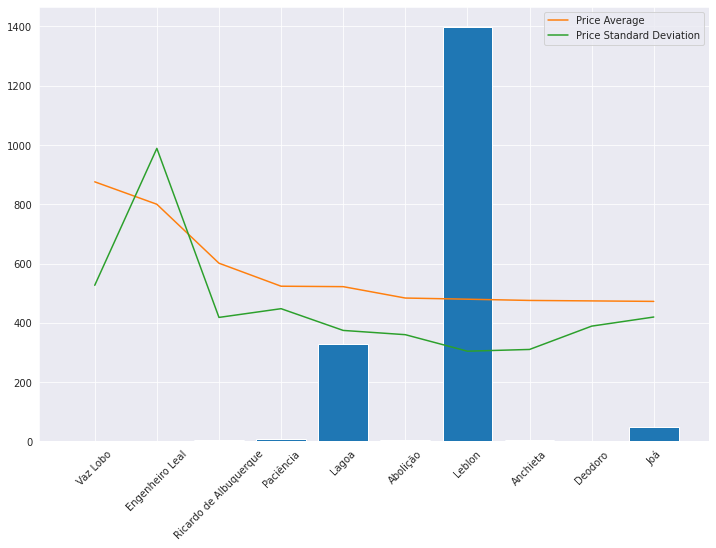

In [52]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x=NH, height=NUM, color='C0');
ax.plot(NH,AVG, color='C1');
ax.plot(NH, STD, color='C2');
ax.legend(['Price Average', 'Price Standard Deviation']);
plt.xticks(rotation=45);

The amount of accomodations seems to be relevant to represent the mean prices for each neighbourhood, as the most "*non-real*" values have lack of sample space and have shown large standard deviation compared to regions with larger number of accomodations, it can be considered the reason of theese unexpected results.


#### Geographical Distribution

The plot bellow can better ilustrate the geographical arrangement of the Airbnb accomodations in Rio de Janeiro as as function of price.. 

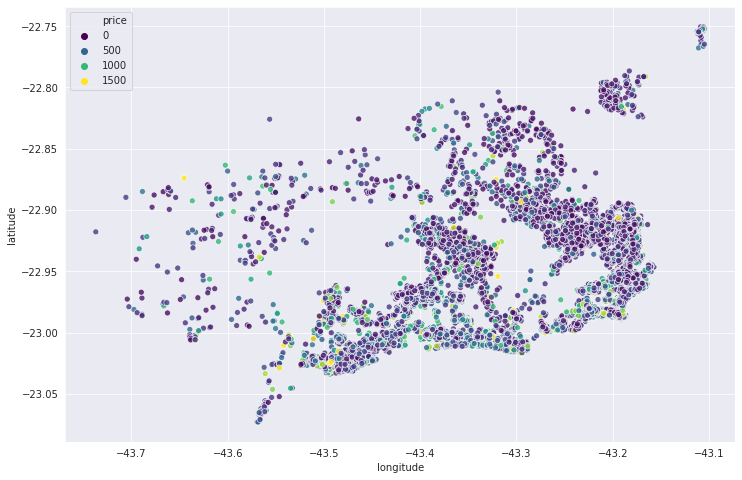

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=df_new, hue='price', palette='viridis', alpha=0.8)
plt.legend()

# Conclusions

This is a superficial analysis of the Airbnb accomodations in Rio de Janeiro, in which some outliers and missing values werer treated.


It was possible to abserve that there are a lot of areas in the city that not yet offers Airbnb accomodations and that most hosts are located in the wealthiest part of the city.


The data here treated is a short version of the original one, that would recquire more powerfull computational processment and, therefore is an idea for a future project.